In [17]:
# load modules 

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
from funcs import *
import os 
from xgcm import Grid

In [18]:
Lcoarse = 50e3

In [19]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
diff_tensor_constrained = xr.open_dataset('./outputs_ncfiles/diff_tensor_constrained'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [20]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [21]:
[UpCp, VpCp, WpCp] = get_flux_arrays(Trac_coarse, list_trac)
[dCdx, dCdy, dCdz]= get_grad_arrays(Trac_coarse, list_trac)

In [22]:
fluxT = xr.Dataset({'UpCp':T_coarse.UpTp, 'VpCp':T_coarse.VpTp, 'WpCp':T_coarse.WpTp})
gradT = xr.Dataset({'dCdx':T_coarse.T_X, 'dCdy':T_coarse.T_Y, 'dCdz':T_coarse.T_Z})

In [23]:
flux = xr.Dataset({'UpCp':UpCp, 'VpCp':VpCp, 'WpCp':WpCp})
grads = xr.Dataset({'dCdx':dCdx, 'dCdy':dCdy, 'dCdz':dCdz})

In [24]:
def flux_reconstruct(tensor, flux, grads):

    recUflux = -(tensor.sel(i=0, j=0)*grads.dCdx + tensor.sel(i=0, j=1)*grads.dCdy + tensor.sel(i=0, j=2)*grads.dCdz)
    recVflux = -(tensor.sel(i=1, j=0)*grads.dCdx + tensor.sel(i=1, j=1)*grads.dCdy + tensor.sel(i=1, j=2)*grads.dCdz)
    recWflux = -(tensor.sel(i=2, j=0)*grads.dCdx + tensor.sel(i=2, j=1)*grads.dCdy + tensor.sel(i=2, j=2)*grads.dCdz)

    errU = np.abs(flux.UpCp - recUflux)/np.abs(flux.UpCp)
    errV = np.abs(flux.VpCp - recVflux)/np.abs(flux.VpCp)
    errW = np.abs(flux.WpCp - recWflux)/np.abs(flux.WpCp)
    
    flux_rec=xr.Dataset({'UpCp':recUflux, 'VpCp':recVflux, 'WpCp':recWflux,
                                'errU':errU, 'errV':errV, 'errW':errW})
    
    return flux_rec

In [43]:
frb = flux_reconstruct(diff_tensor.Kcorr, fluxT, gradT)
frb_AT = flux_reconstruct(diff_tensor.ATcorr , fluxT, gradT) 
frb_ST = flux_reconstruct(diff_tensor.STcorr , fluxT, gradT) 

In [44]:
frb_constrained = flux_reconstruct(diff_tensor_constrained.Kcorr, fluxT, gradT)
frb_AT_constrained = flux_reconstruct(diff_tensor_constrained.ATcorr , fluxT, gradT) 
frb_ST_constrained = flux_reconstruct(diff_tensor_constrained.STcorr , fluxT, gradT) 

## how do the eigenvalues change? 

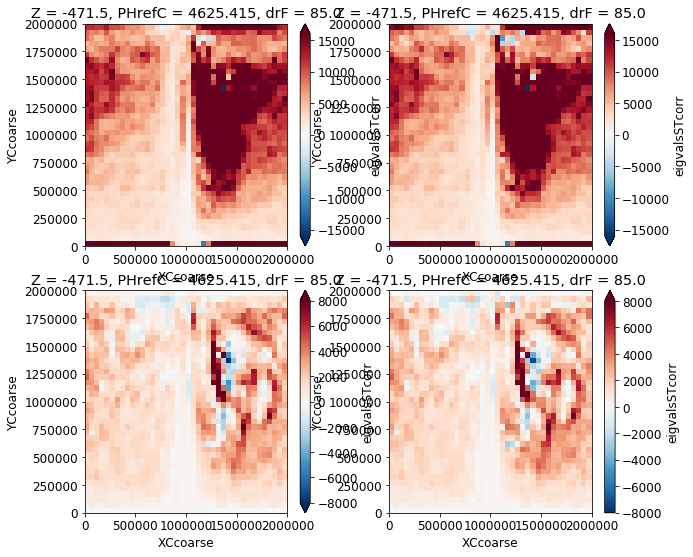

In [33]:
plt.figure(figsize=(10,9))

plt.subplot(221)
diff_tensor.eigvalsSTcorr.sel(Z=-500, method='nearest').isel(ii=2).plot(vmin=-16000)

plt.subplot(222)
diff_tensor_constrained.eigvalsSTcorr.sel(Z=-500, method='nearest').isel(ii=2).plot(vmin=-16000)

plt.subplot(223)
diff_tensor.eigvalsSTcorr.sel(Z=-500, method='nearest').isel(ii=1).plot(vmin=-8000)

plt.subplot(224)
diff_tensor_constrained.eigvalsSTcorr.sel(Z=-500, method='nearest').isel(ii=1).plot(vmin=-8000)


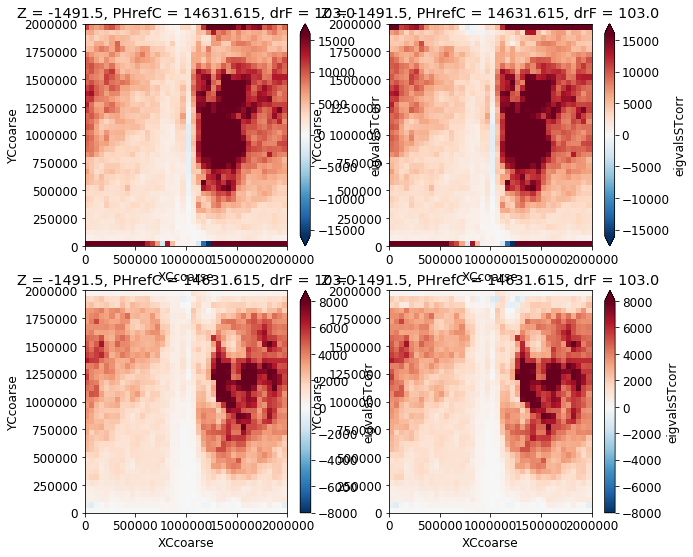

In [39]:
plt.figure(figsize=(10,9))

plt.subplot(221)
diff_tensor.eigvalsSTcorr.sel(Z=-1500, method='nearest').isel(ii=2).plot(vmin=-16000)

plt.subplot(222)
diff_tensor_constrained.eigvalsSTcorr.sel(Z=-1500, method='nearest').isel(ii=2).plot(vmin=-16000)

plt.subplot(223)
diff_tensor.eigvalsSTcorr.sel(Z=-1500, method='nearest').isel(ii=1).plot(vmin=-8000)

plt.subplot(224)
diff_tensor_constrained.eigvalsSTcorr.sel(Z=-1500, method='nearest').isel(ii=1).plot(vmin=-8000)


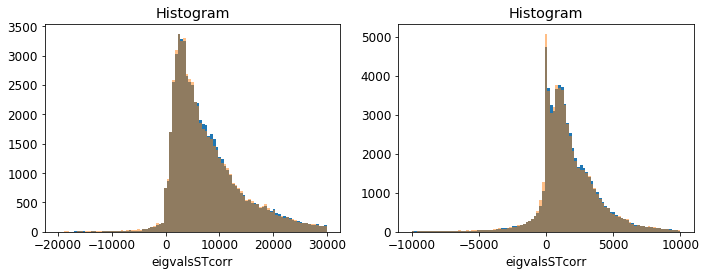

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(121)
bins = np.linspace(-20e3, 30e3, 100)
[_,_,_] = diff_tensor.eigvalsSTcorr.isel(ii=2).plot.hist(bins=bins)
[_,_,_] = diff_tensor_constrained.eigvalsSTcorr.isel(ii=2).plot.hist(bins=bins, alpha=0.5)

plt.subplot(122)
bins = np.linspace(-10e3, 10e3, 100)
[_,_,_] = diff_tensor.eigvalsSTcorr.isel(ii=1).plot.hist(bins=bins)
[_,_,_] = diff_tensor_constrained.eigvalsSTcorr.isel(ii=1).plot.hist(bins=bins, alpha=0.5)

plt.tight_layout()

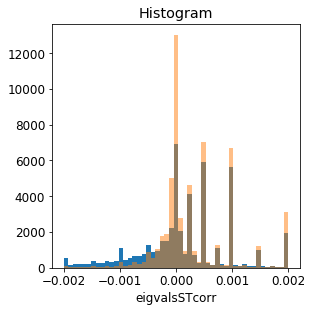

In [98]:
bins = np.linspace(-2e-3, 2e-3, 50)
[_,_,_] = diff_tensor.eigvalsSTcorr.isel(ii=0).plot.hist(bins=bins)
[_,_,_] = diff_tensor_constrained.eigvalsSTcorr.isel(ii=0).plot.hist(bins=bins, alpha=0.5)

plt.tight_layout()

# contributions of S and A to fluxes

In [47]:
magF_true = (fluxT.UpCp**2 + fluxT.VpCp**2 + fluxT.WpCp**2)**0.5

In [45]:
magF = (frb.UpCp**2 + frb.VpCp**2 + frb.WpCp**2)**0.5
magFST = (frb_ST.UpCp**2 + frb_ST.VpCp**2 + frb_ST.WpCp**2)**0.5
magFAT = (frb_AT.UpCp**2 + frb_AT.VpCp**2 + frb_AT.WpCp**2)**0.5

In [46]:
magF_constrained = (frb_constrained.UpCp**2 + frb_constrained.VpCp**2 + frb_constrained.WpCp**2)**0.5
magFST_constrained = (frb_ST_constrained.UpCp**2 + frb_ST_constrained.VpCp**2 + frb_ST_constrained.WpCp**2)**0.5
magFAT_constrained = (frb_AT_constrained.UpCp**2 + frb_AT_constrained.VpCp**2 + frb_AT_constrained.WpCp**2)**0.5

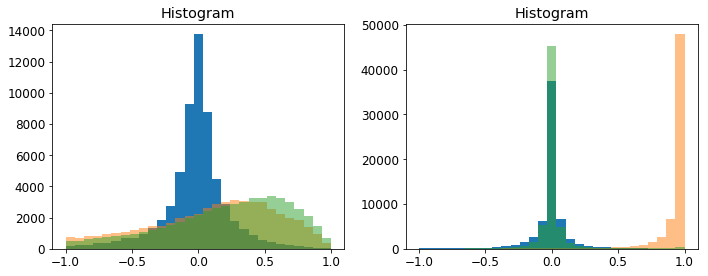

In [53]:
plt.figure(figsize=(10,4))

bins = np.linspace(-1,1,30)

plt.subplot(121)
[_,_,_] = ((magF_true - magF)/magF_true).plot.hist(bins=bins)
[_,_,_] = ((magF_true - magFST)/magF_true).plot.hist(bins=bins, alpha=0.5)
[_,_,_] = ((magF_true - magFAT)/magF_true).plot.hist(bins=bins, alpha=0.5)


plt.subplot(122)
[_,_,_] = ((magF_true - magF_constrained)/magF_true).plot.hist(bins=bins)
[_,_,_] = ((magF_true - magFST_constrained)/magF_true).plot.hist(bins=bins, alpha=0.5)
[_,_,_] = ((magF_true - magFAT_constrained)/magF_true).plot.hist(bins=bins, alpha=0.5)

plt.tight_layout()

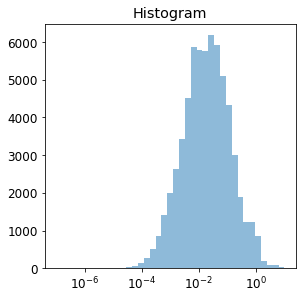

In [58]:
bins = np.logspace(-7, 1,40)
[_,_,_] = ((magFST_constrained)/magF_true).plot.hist(bins=bins, alpha=0.5)
plt.xscale('log')

## Do the psi_i look different?


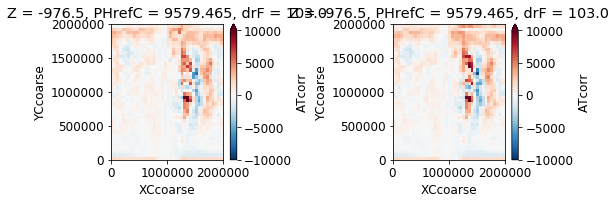

In [69]:
plt.figure(figsize=(8,3))

plt.subplot(121)
diff_tensor.ATcorr.isel(i=0,j=1).sel(Z=-1000, method='nearest').plot(vmin=-1e4)
plt.title('psi3')

plt.subplot(122)
diff_tensor_constrained.ATcorr.isel(i=0,j=1).sel(Z=-1000, method='nearest').plot(vmin=-1e4)
plt.title('psi3')
plt.tight_layout()

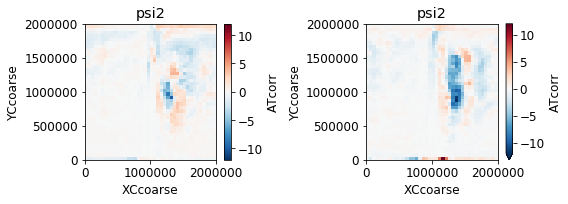

In [70]:
plt.figure(figsize=(8,3))

plt.subplot(121)
diff_tensor.ATcorr.isel(i=0,j=2).sel(Z=-1000, method='nearest').plot(vmin=-12)
plt.title('psi2')

plt.subplot(122)
diff_tensor_constrained.ATcorr.isel(i=0,j=2).sel(Z=-1000, method='nearest').plot(vmin=-12)
plt.title('psi2')

plt.tight_layout()

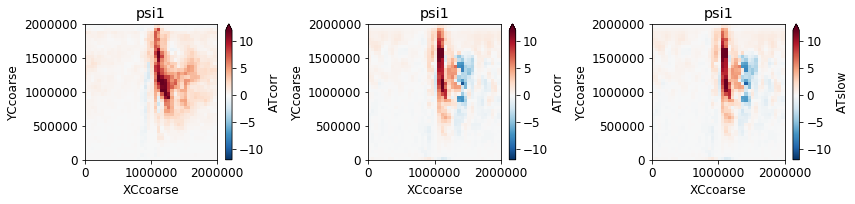

In [75]:
plt.figure(figsize=(12,3))

plt.subplot(131)
diff_tensor.ATcorr.isel(i=1,j=2).sel(Z=-1000, method='nearest').plot(vmin=-12)
plt.title('psi1')

plt.subplot(132)
diff_tensor_constrained.ATcorr.isel(i=1,j=2).sel(Z=-1000, method='nearest').plot(vmin=-12)
plt.title('psi1')

plt.subplot(133)
diff_tensor_constrained.ATslow.isel(i=1,j=2).sel(Z=-1000, method='nearest').plot(vmin=-12)
plt.title('psi1')

plt.tight_layout()

### Estimate K_gm
\begin{equation}\label{A}
\mathbf{A}  = 
\begin{bmatrix}
~0 & ~\psi_3 & -\psi_2\\
-\psi_3 & ~0 & ~\psi_1\\
~\psi_2 & -\psi_1 & ~0 
\end{bmatrix},
\end{equation}

\begin{equation}
\mathbf{A_{GM}}  = K_{GM}
\begin{bmatrix}
~0 & ~0 & -Sx\\
~0 & ~0 & -Sy\\
Sx & Sy & ~0 
\end{bmatrix},
\end{equation}

In [73]:
Sx = - T_coarse.T_X/ T_coarse.T_Z
Sy = - T_coarse.T_Y/ T_coarse.T_Z

In [88]:
psi2_constrained =  - diff_tensor_constrained.ATcorr.isel(i=0, j=2)
psi1_constrained =  diff_tensor_constrained.ATcorr.isel(i=1, j=2)
psi2 =  - diff_tensor.ATcorr.isel(i=0, j=2)
psi1 =  diff_tensor.ATcorr.isel(i=1, j=2)


In [89]:
Kgmx_constrained = psi2_constrained/Sx
Kgmy_constrained = -psi1_constrained/Sy
Kgmx = psi2/Sx
Kgmy = -psi1/Sy


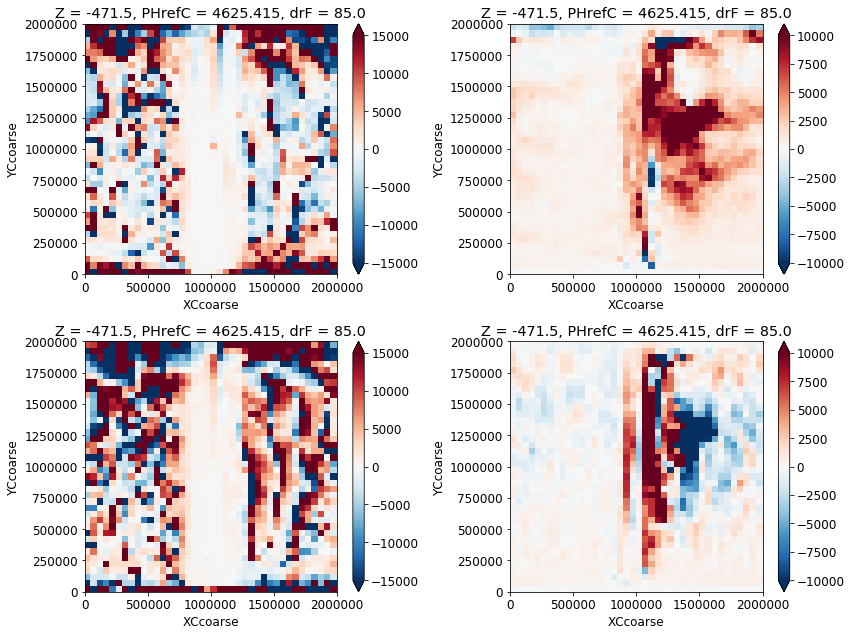

In [102]:
plt.figure(figsize=(12,9))

plt.subplot(221)
Kgmx.sel(Z=-500,method='nearest').plot(vmin=-15000)

plt.subplot(222)
Kgmy.sel(Z=-500,method='nearest').plot(vmin=-10000)

plt.subplot(223)
Kgmx_constrained.sel(Z=-500,method='nearest').plot(vmin=-15000)

plt.subplot(224)
Kgmy_constrained.sel(Z=-500,method='nearest').plot(vmin=-10000)

plt.tight_layout()

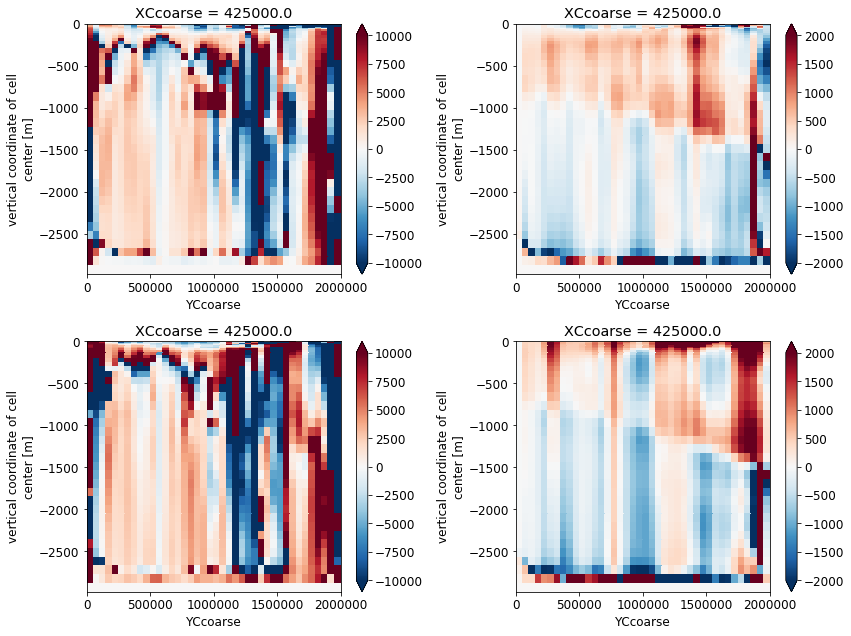

In [101]:
plt.figure(figsize=(12,9))

plt.subplot(221)
Kgmx.sel(XCcoarse =400e3,method='nearest').plot(vmin=-10000)

plt.subplot(222)
Kgmy.sel(XCcoarse =400e3,method='nearest').plot(vmin=-2000)

plt.subplot(223)
Kgmx_constrained.sel(XCcoarse =400e3,method='nearest').plot(vmin=-10000)

plt.subplot(224)
Kgmy_constrained.sel(XCcoarse =400e3,method='nearest').plot(vmin=-2000)

plt.tight_layout()

In [108]:
# estimate GM 
KgmPE = T_coarse.T_Z/(T_coarse.T_X**2 + T_coarse.T_Y**2)*(psi1*T_coarse.T_Y - psi2*T_coarse.T_X)
KgmPE_constrained = T_coarse.T_Z/(T_coarse.T_X**2 + T_coarse.T_Y**2)*(psi1_constrained*T_coarse.T_Y - psi2_constrained*T_coarse.T_X)

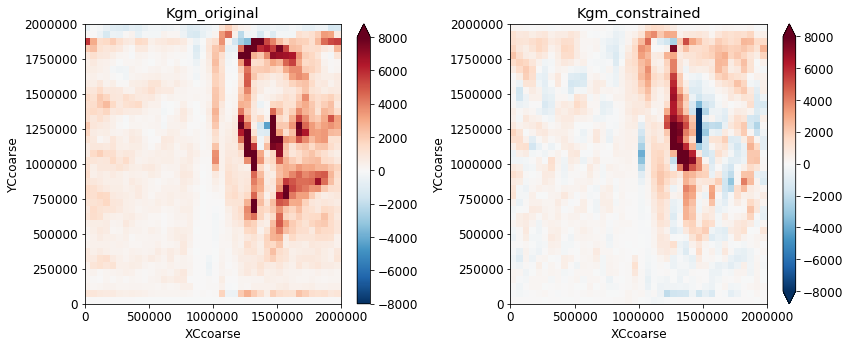

In [116]:
plt.figure(figsize=(12,5))

plt.subplot(121)
KgmPE.sel(Z=-800, method='nearest').plot(vmin=-8000)
plt.title('Kgm_original')

plt.subplot(122)
KgmPE_constrained.sel(Z=-800, method='nearest').plot(vmin=-8000)
plt.title('Kgm_constrained')

plt.tight_layout()

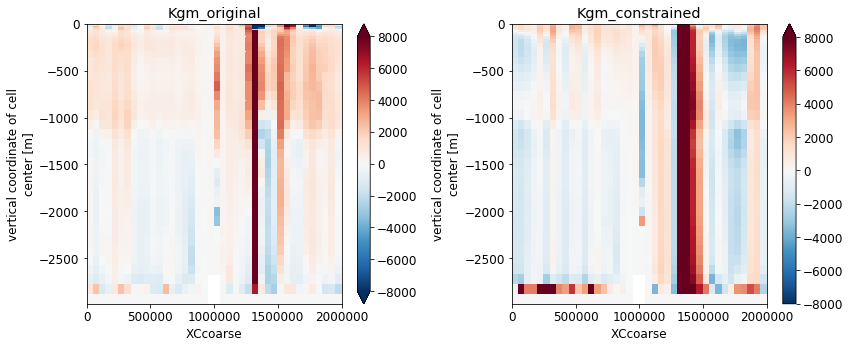

In [117]:
plt.figure(figsize=(12,5))

plt.subplot(121)
KgmPE.sel(YCcoarse=1000e3, method='nearest').plot(vmin=-8000)
plt.title('Kgm_original')

plt.subplot(122)
KgmPE_constrained.sel(YCcoarse=1000e3, method='nearest').plot(vmin=-8000)
plt.title('Kgm_constrained')

plt.tight_layout()

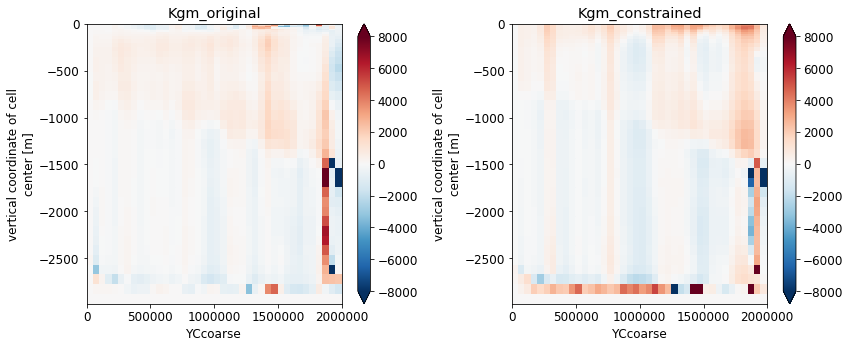

In [120]:
plt.figure(figsize=(12,5))

plt.subplot(121)
KgmPE.sel(XCcoarse=400e3, method='nearest').plot(vmin=-8000)
plt.title('Kgm_original')

plt.subplot(122)
KgmPE_constrained.sel(XCcoarse=400e3, method='nearest').plot(vmin=-8000)
plt.title('Kgm_constrained')

plt.tight_layout()

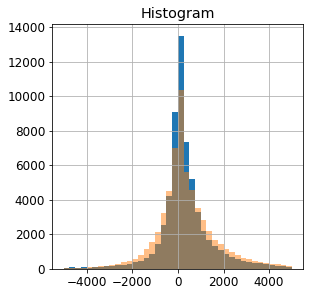

In [127]:
bins = np.linspace(-5e3, 5e3, 41)
[_,_,_] = KgmPE.plot.hist(bins= bins)
[_,_,_] = KgmPE_constrained.plot.hist(bins= bins, alpha=0.5)
plt.grid()

In [132]:
# Kgm from w'b' 

Kgm_wb = fluxT.WpCp*T_coarse.T_Z / (T_coarse.T_X**2 + T_coarse.T_Y**2)


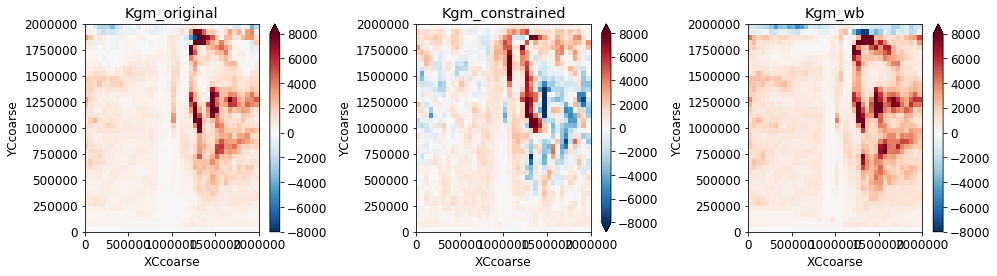

In [143]:
plt.figure(figsize=(14,4))

plt.subplot(131)
KgmPE.sel(Z=-200, method='nearest').plot(vmin=-8000)
plt.title('Kgm_original')

plt.subplot(132)
KgmPE_constrained.sel(Z=-200, method='nearest').plot(vmin=-8000)
plt.title('Kgm_constrained')

plt.subplot(133)
Kgm_wb.sel(Z=-200, method='nearest').plot(vmin=-8000)
plt.title('Kgm_wb')

plt.tight_layout()

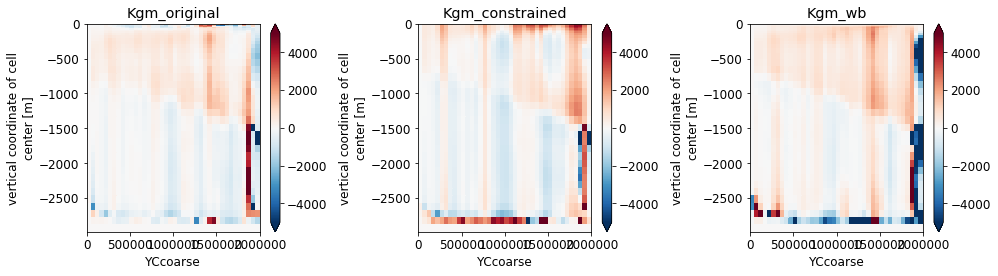

In [140]:
plt.figure(figsize=(14,4))

plt.subplot(131)
KgmPE.sel(XCcoarse=400e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_original')

plt.subplot(132)
KgmPE_constrained.sel(XCcoarse=400e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_constrained')

plt.subplot(133)
Kgm_wb.sel(XCcoarse=400e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_wb')

plt.tight_layout()

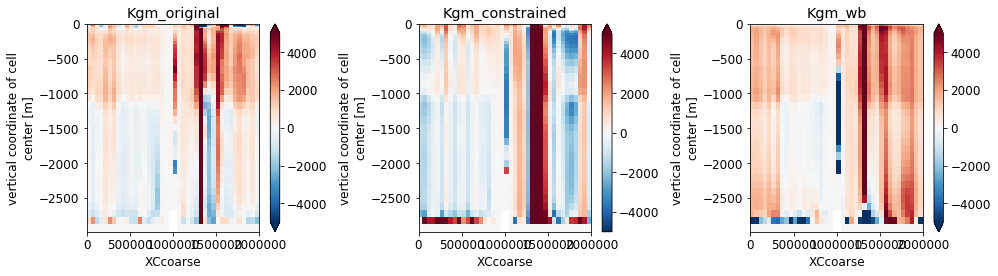

In [141]:
plt.figure(figsize=(14,4))

plt.subplot(131)
KgmPE.sel(YCcoarse=1000e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_original')

plt.subplot(132)
KgmPE_constrained.sel(YCcoarse=1000e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_constrained')

plt.subplot(133)
Kgm_wb.sel(YCcoarse=1000e3, method='nearest').plot(vmin=-5000)
plt.title('Kgm_wb')

plt.tight_layout()